In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [8]:
#Load MNIST Dataset:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [9]:
#Preprocessing or Normalizing the pixel values to be between 0 and 1

train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images into 3 dimensions as cnn excepts each images into such and mnists data is greyscale:
train_images = train_images.reshape((train_images.shape[0], 28,28,1))
test_images = test_images.reshape((test_images.shape[0], 28,28,1))

#Covert the labels into one-hot encoded format:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
#Building CNN Model:
model = models.Sequential()

#First convolutional layer:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))

#Second convolutional layer:
model.add(layers.MaxPooling2D((2,2)))

#Third convolutional layer:
model.add(layers.Conv2D(64, (3,3), activation='relu'))

#Flatten the 3d output to 1d and add a dense layer:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

#Output layers with 10 neurons (for 10 digit classes)
model.add(layers.Dense(10, activation='softmax'))

c:\Users\saadt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
#Compile the model:
model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )

In [12]:
#Train the model:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9012 - loss: 0.3232 - val_accuracy: 0.9827 - val_loss: 0.0521
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9849 - loss: 0.0469 - val_accuracy: 0.9839 - val_loss: 0.0479
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9909 - loss: 0.0281 - val_accuracy: 0.9880 - val_loss: 0.0373
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9938 - loss: 0.0179 - val_accuracy: 0.9890 - val_loss: 0.0337
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9963 - loss: 0.0130 - val_accuracy: 0.9893 - val_loss: 0.0352


In [17]:
# Evaluate the model on test data:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test Accuracy:{test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9865 - loss: 0.0441
Test Accuracy:0.989300012588501


In [ ]:
#Make Predictions:
# predictions = model.predict(test_images)

# print(f"Prediction for the first test image: {np.argmax(predictions[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Prediction for the first test image: 7


Text(0.5, 1.0, 'Predicted label: 2')

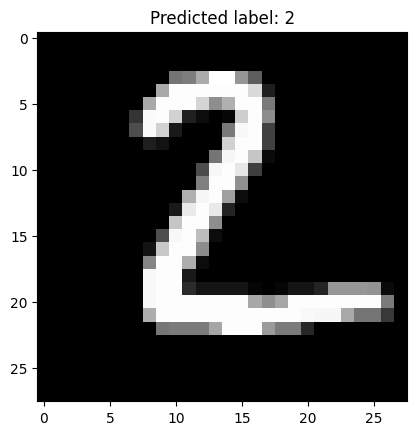

In [ ]:
#Visualization:

# plt.imshow(test_images[1].reshape(28,28), cmap='gray')
# plt.title(f"Predicted label: {predictions[1].argmax()}")

In [ ]:
# Function to preprocess the image using PIL
def preprocess_image(image_path):
    # Open the image and convert to grayscale
    img = Image.open(image_path).convert('L')

    # Resize to 28x28 pixels
    img = img.resize((28, 28))

    # Invert colors if background is white (optional)
    img = ImageOps.invert(img)

    # Convert to NumPy array
    img_array = np.array(img)

    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0

    # Reshape to (1, 28, 28, 1) as expected by the model
    img_array = img_array.reshape(1, 28, 28, 1)

    return img_array

# Function to predict the digit
def predict_digit(image_path):
    img_input = preprocess_image(image_path)
    prediction = model.predict(img_input)
    predicted_digit = np.argmax(prediction)
    print(f"🧠 Predicted Digit: {predicted_digit}")
    return predicted_digit


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
🧠 Predicted Digit: 0


np.int64(2)

In [ ]:
# User input
image_path = input("Enter path to the image with extension:")  # Replace with your actual image file
predict_digit(image_path)